Рассчитаем экспоненциальные средние для временного ряда

![Экспоненциальные средние](1_03.gif)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("https://video.ittensive.com/time-series/ittensive.time.series.01.csv", decimal=',')
data = data[::-1].reset_index()
data.head()

,index,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,150,Нояб. '09,108.25,104.75,114.13,104.10,-,"3,34%"
1,149,Дек. '09,108.40,108.25,110.25,105.75,-,"0,14%"
2,148,Янв. '10,96.78,108.40,111.53,96.10,-,"-10,72%"
3,147,Февр. '10,97.13,97.03,101.13,91.43,-,"0,36%"
4,146,Март '10,98.88,97.13,100.38,91.78,-,"1,80%"


Вычислим бегущее среднее с окнами в 2, 3, 6 и 12 месяцев назад

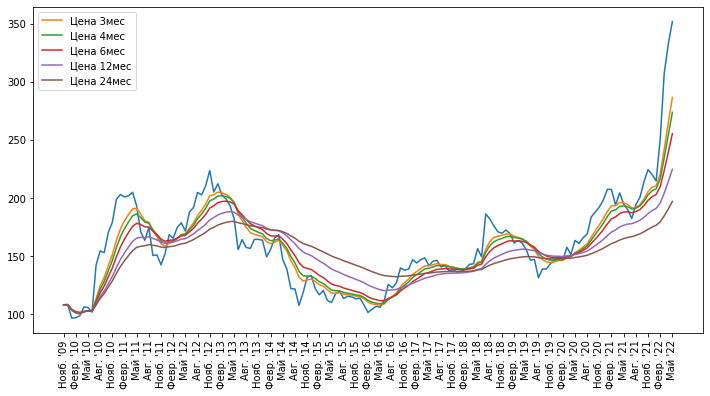

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data["Дата"].values,data["Цена"].values)
labels = []
for window in [3,4,6,12,24]:
    label = "Цена " + str(window) + "мес"
    data[label] = data["Цена"].ewm(window).mean()
    labels.append(label)
    plt.plot(data[label], label=label)
plt.xticks(data.index[::3], data["Дата"].values[::3], rotation=90)
plt.legend()
plt.show()

Построим линейную регрессию на бегущих средних

In [4]:
x = data[labels][11:len(data)-1]
y = data["Цена"][12:]
model = LinearRegression().fit(x, y)
data["Предсказание"] = np.append(np.zeros(12), model.predict(x))
print ("Коэффициенты модели:", model.coef_)

Коэффициенты модели: [ 31.02747605 -55.5743512   31.52976819  -6.88001315   0.80183397]


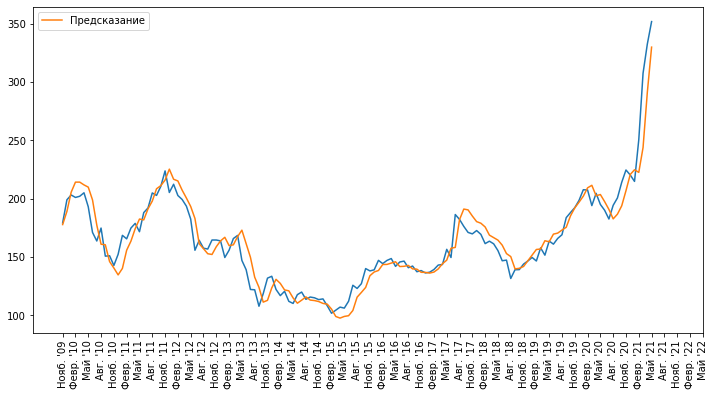

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data["Дата"][12:].values,data["Цена"][12:].values)
plt.plot(model.predict(x), label="Предсказание")
plt.xticks(data.index[::3], data["Дата"].values[::3], rotation=90)
plt.legend()
plt.show()

Вычислим среднеквадратичную ошибку

In [6]:
print ("MSE:", round((data[12:].apply(lambda row: (row['Цена'] - row['Предсказание'])**2, axis=1).sum()/(len(data)-12))**(0.5),2))

MSE: 12.71
